In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("walmart-sales-dataset-of-45stores.csv")

In [4]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data.shape

(6435, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [11]:
data['Date'] = pd.to_datetime(data['Date'],dayfirst = True)
data = data.sort_values('Date')

data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1287,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765
5148,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554
2288,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324


In [12]:
weekly_sales = (data.groupby('Date')["Weekly_Sales"]
                .sum().reset_index()
               )
print(weekly_sales)

          Date  Weekly_Sales
0   2010-02-05   49750740.50
1   2010-02-12   48336677.63
2   2010-02-19   48276993.78
3   2010-02-26   43968571.13
4   2010-03-05   46871470.30
..         ...           ...
138 2012-09-28   43734899.40
139 2012-10-05   47566639.31
140 2012-10-12   46128514.25
141 2012-10-19   45122410.57
142 2012-10-26   45544116.29

[143 rows x 2 columns]


In [13]:
weekly_sales_clean = weekly_sales[['Weekly_Sales']].copy()

In [14]:
weekly_sales_clean.index = pd.to_datetime(weekly_sales_clean.index)

In [15]:
weekly_sales_clean.dropna(inplace=True)

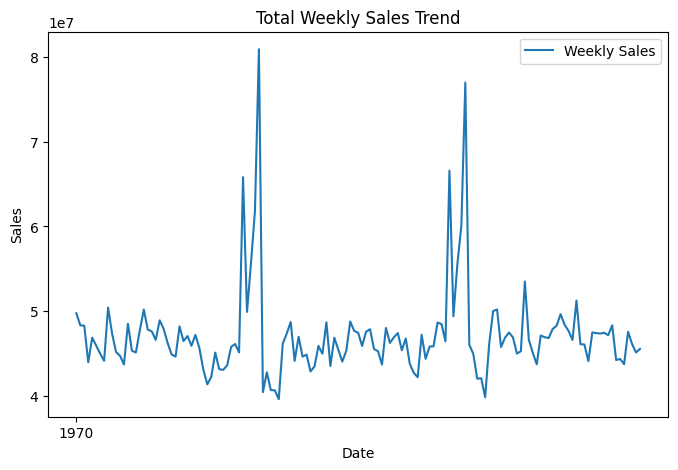

In [16]:
plt.figure(figsize=(8,5))
plt.plot(
    weekly_sales_clean.index,
    weekly_sales_clean['Weekly_Sales'],
    label='Weekly Sales'
)
plt.title("Total Weekly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

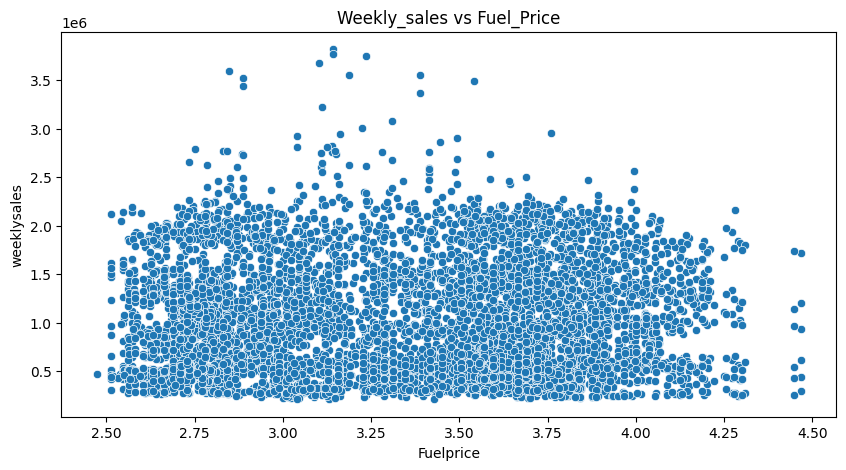

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = data["Fuel_Price"],y = data["Weekly_Sales"])
plt.title("Weekly_sales vs Fuel_Price")
plt.xlabel("Fuelprice")
plt.ylabel("weeklysales")
plt.show()

In [19]:
type(weekly_sales.index)

pandas.core.indexes.range.RangeIndex

In [20]:
weekly_sales.index = pd.to_datetime(weekly_sales.index)

In [21]:
weekly_sales["year"] = weekly_sales.index.year
weekly_sales["month"] = weekly_sales.index.month

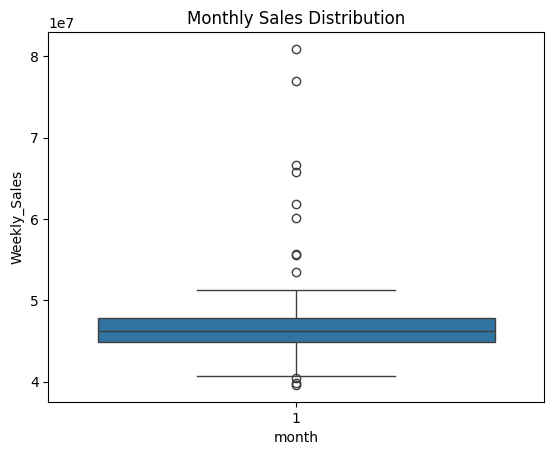

In [22]:
sns.boxplot(x='month', y='Weekly_Sales', data=weekly_sales.reset_index())
plt.title("Monthly Sales Distribution")
plt.show()

In [23]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])

adf_test(weekly_sales['Weekly_Sales'])


ADF Statistic: -5.908297957186336
p-value: 2.675979158986003e-07


In [24]:
weekly_sales['diff_sales'] = weekly_sales['Weekly_Sales'].diff()
weekly_sales.dropna(inplace=True)

adf_test(weekly_sales['diff_sales'])


ADF Statistic: -6.699469309617217
p-value: 3.922578707076831e-09


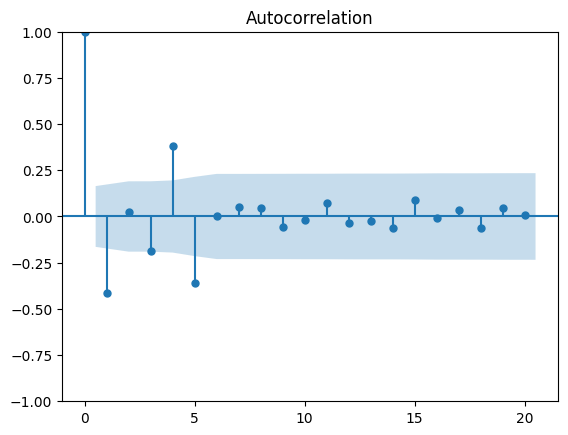

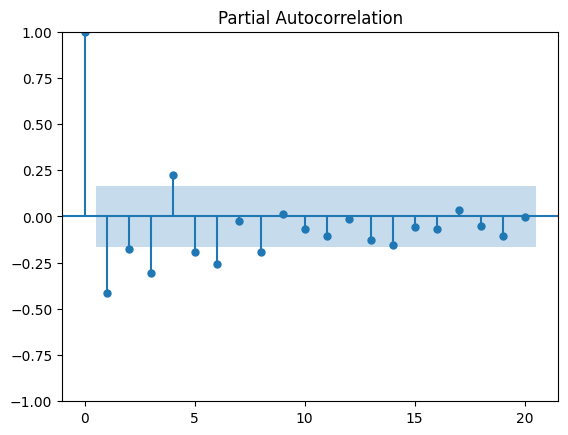

In [25]:
plot_acf(weekly_sales['diff_sales'], lags=20)
plot_pacf(weekly_sales['diff_sales'], lags=20)
plt.show()


In [26]:
train_size = int(len(weekly_sales) * 0.8)
train = weekly_sales['Weekly_Sales'][:train_size]
test = weekly_sales['Weekly_Sales'][train_size:]


In [27]:
arma_model = ARIMA(train, order=(1,0,1))
arma_result = arma_model.fit()

arma_forecast = arma_result.forecast(steps=len(test))


C:\Users\Sriharshini\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\Sriharshini\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\Sriharshini\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


In [28]:
arma_model = ARIMA(train, order=(1,0,1))
arma_result = arma_model.fit()

arma_forecast = arma_result.forecast(steps=len(test))


C:\Users\Sriharshini\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\Sriharshini\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\Sriharshini\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


In [29]:
arima_model = ARIMA(train, order=(1,1,1))
arima_result = arima_model.fit()

arima_forecast = arima_result.forecast(steps=len(test))


C:\Users\Sriharshini\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\Sriharshini\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\Sriharshini\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


In [30]:
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mae, rmse

arma_mae, arma_rmse = evaluate_model(test, arma_forecast)
arima_mae, arima_rmse = evaluate_model(test, arima_forecast)

print("ARMA → MAE:", arma_mae, "RMSE:", arma_rmse)
print("ARIMA → MAE:", arima_mae, "RMSE:", arima_rmse)


ARMA → MAE: 1487029.5715228992 RMSE: 1937249.1209171452
ARIMA → MAE: 1879756.2212721137 RMSE: 2381306.990658736


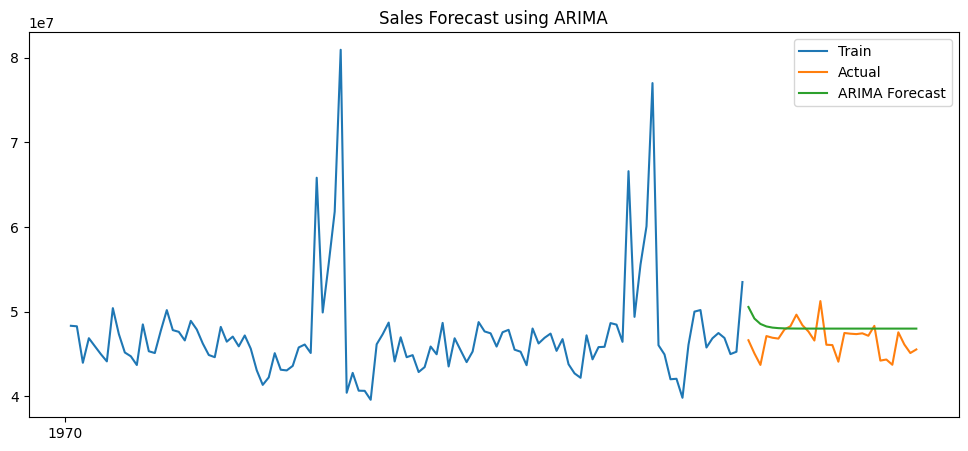

In [31]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.title("Sales Forecast using ARIMA")
plt.show()
